# 0.1 - Exploratory Data Analysis and Data Cleaning

This notebook serves as the initial step in the project. Its purpose is to:
1.  Load the raw "Adult Income" dataset.
2.  Perform a thorough exploratory data analysis (EDA) to understand its structure, distributions, and relationships.
3.  Identify and handle data quality issues like missing values.
4.  Apply initial cleaning and preprocessing steps.
5.  Save the cleaned, processed dataset to the `data/processed` directory, so all subsequent modeling notebooks can start from a consistent and clean state.


In [1]:
# Library Imports

# Data manipulation
import pandas as pd
import numpy as np
import math
import os

# Dataset loading
from sklearn.datasets import fetch_openml

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# General settings
import warnings
warnings.filterwarnings('ignore')

# Visualization style
sns.set(style='whitegrid')

## 1. Load and Explore the Dataset

In this first step, we will work with the **Adult Income** dataset.

### Specific Goals:
- **Load the dataset** from `OpenML`.
- **Explore and clean the data**, handling missing or inconsistent values.
- **Save the cleaned dataset** to be used by other notebooks.


In [2]:
# Load the dataset
# Note: We are not using the load_data function here as this notebook *creates* the processed data
adult_data = fetch_openml(name='adult', version=2, as_frame=True)

# Extract the data and target
df = adult_data.frame

# Display the first few rows
print('DataFrame dimensions:', df.shape)
df.head()

DataFrame dimensions: (48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# General dataset info
df.info()

# Descriptive statistics for numerical variables
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# Categorical columns
cat_cols = df.select_dtypes(include='category').columns.tolist()
print("Categorical variables:", cat_cols)

# Numerical columns
num_cols = df.select_dtypes(exclude='category').columns.tolist()
print("Numerical variables:", num_cols)

Categorical variables: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']
Numerical variables: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


## 2. Data Cleaning

In this section, we will address the data quality issues identified in the initial exploration.

- **Missing Values:** We will review the columns with `NaN` values and apply a strategy to handle them. Since the percentage of missing data is low, we will choose to remove the corresponding rows.
- **Simplify 'native-country'**: The `native-country` variable is heavily dominated by one category (`United-States`). To make the model more robust, all other nationalities will be grouped into a single category, 'Other'.


In [5]:
# Count missing values per column
print("Columns with NaN values before cleaning:")
print(df.isnull().sum())

# Drop rows with NaN values
df_cleaned = df.dropna()

print("\nDimensions after dropping NaNs:", df_cleaned.shape)

# Simplify the 'native-country' column
df_cleaned['native-country'] = df_cleaned['native-country'].apply(lambda x: x if x == 'United-States' else 'Other')

print("\nUnique values in 'native-country' after simplification:")
print(df_cleaned['native-country'].value_counts())

Columns with NaN values before cleaning:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

Dimensions after dropping NaNs: (45222, 15)

Unique values in 'native-country' after simplification:
native-country
United-States    41292
Other             3930
Name: count, dtype: int64


## 3. Data Visualization

Once the data is clean, we proceed to visualize the distributions of numerical and categorical variables to better understand their characteristics.


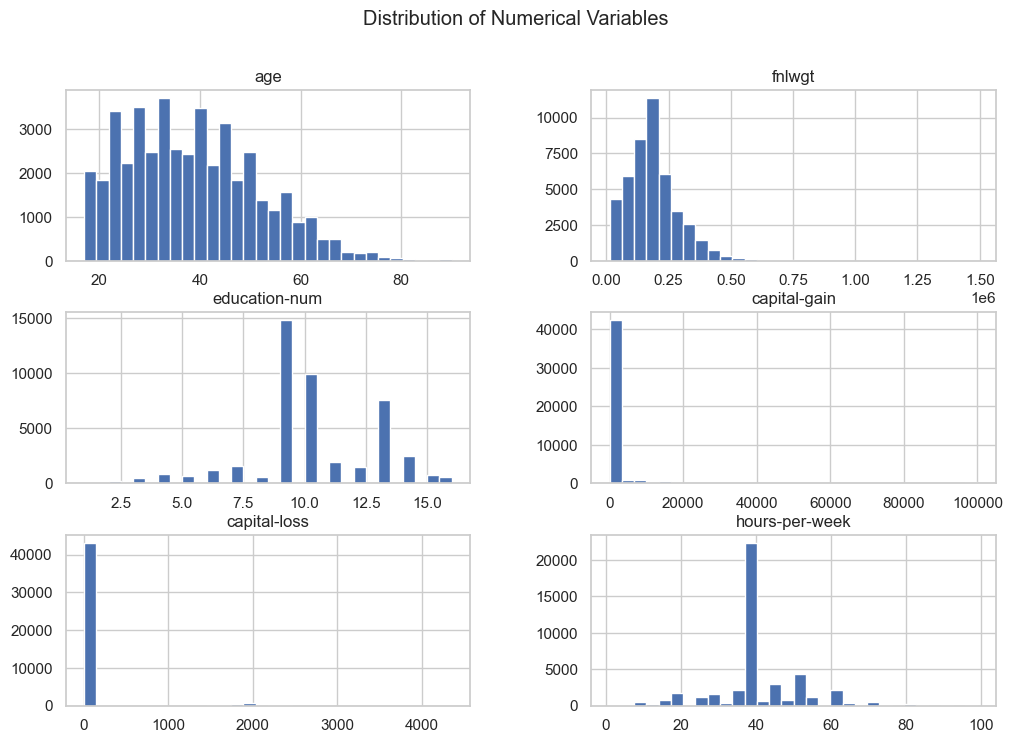

In [6]:
# Histograms for numerical variables
df_cleaned[num_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Variables")
plt.savefig('../reports/figures/0.1_numerical_distribution.png')
plt.show()

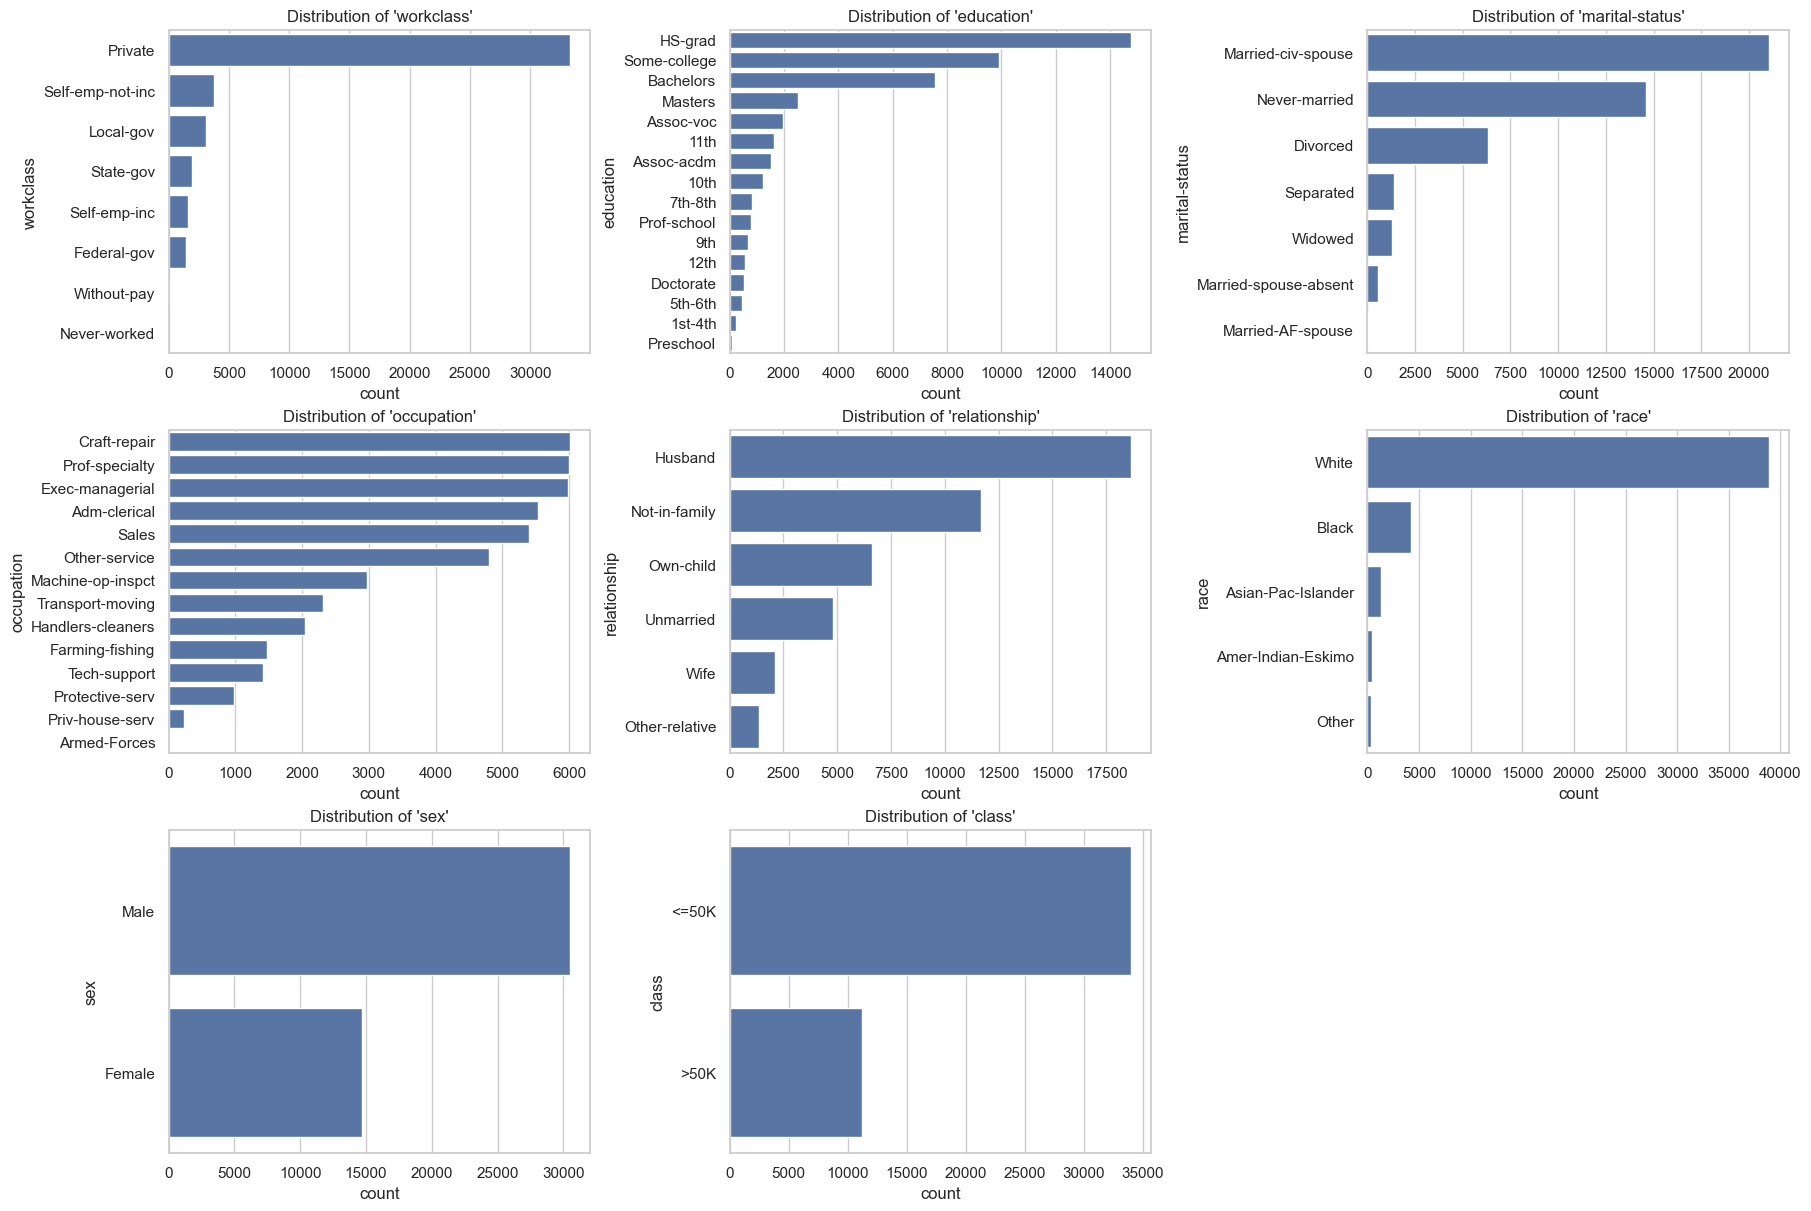

In [7]:
# Countplots for categorical variables

# Total number of categorical variables
cat_cols_cleaned = df_cleaned.select_dtypes(include='category').columns.tolist()
num_vars = len(cat_cols_cleaned)


# Define number of columns and rows for the grid
cols = 3
rows = math.ceil(num_vars / cols)

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each categorical variable in a subplot
for i, col in enumerate(cat_cols_cleaned):
    sns.countplot(data=df_cleaned, y=col, order=df_cleaned[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Distribution of '{col}'")

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.savefig('../reports/figures/0.1_categorical_distribution.png')
plt.show()

## 4. Save Processed Data

The final step in this notebook is to save the cleaned `DataFrame` to a CSV file. This will allow the modeling notebooks to directly load the processed data, ensuring consistency and avoiding the repetition of cleaning steps.


In [8]:
# Define the output path
output_path = '../data/processed/adult_cleaned.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)


# Save the dataframe
df_cleaned.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to: {output_path}")

Cleaned dataset saved to: ../data/processed/adult_cleaned.csv
